In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [2]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install cufflinks

Note: you may need to restart the kernel to use updated packages.


In [4]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
print(__version__) 

import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

5.9.0


In [57]:
data=pd.read_csv(r'marketing.csv')
data

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,response,result
0,13829,29,technician,single,tertiary,no,18254,no,no,cellular,11,may,2,-1,0,unknown,no
1,22677,26,services,single,secondary,no,512,yes,yes,unknown,5,jun,3,-1,0,unknown,no
2,10541,30,management,single,secondary,no,135,no,no,cellular,14,aug,2,-1,0,unknown,no
3,13689,41,technician,married,unknown,no,30,yes,no,cellular,10,jul,1,-1,0,unknown,no
4,11304,27,admin.,single,secondary,no,321,no,yes,unknown,2,sep,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12865,14023,47,technician,married,secondary,no,1167,yes,no,cellular,30,apr,1,87,5,failure,yes
12866,17259,31,unknown,married,secondary,no,111,no,no,cellular,21,nov,2,93,2,failure,yes
12867,15200,37,unemployed,single,tertiary,no,1316,yes,no,cellular,18,nov,1,172,2,failure,no
12868,13775,42,management,married,tertiary,no,479,yes,no,unknown,28,may,2,-1,0,unknown,no


In [58]:
pd.set_option('display.max_columns',40)
data.describe(include='all')

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,response,result
count,12870.000000,12870.000000,12870,12870,12870,12870,12870.000000,12870,12870,12870,12870.000000,12870,12870.000000,12870.000000,12870.000000,12870,12870
unique,NaN,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,4,2
top,NaN,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,unknown,no
freq,NaN,NaN,2858,7490,6368,12662,NaN,6605,11060,8756,NaN,3594,NaN,NaN,NaN,10070,8903
mean,16434.500000,41.091142,NaN,NaN,NaN,NaN,1483.774437,NaN,NaN,NaN,15.641103,NaN,2.659130,45.555478,0.688967,NaN,NaN
std,3715.393317,11.305560,NaN,NaN,NaN,NaN,3311.055181,NaN,NaN,NaN,8.368983,NaN,2.863507,104.449411,2.049696,NaN,NaN
min,10000.000000,18.000000,NaN,NaN,NaN,NaN,-6847.000000,NaN,NaN,NaN,1.000000,NaN,1.000000,-1.000000,0.000000,NaN,NaN
25%,13217.250000,32.000000,NaN,NaN,NaN,NaN,102.000000,NaN,NaN,NaN,8.000000,NaN,1.000000,-1.000000,0.000000,NaN,NaN
50%,16434.500000,39.000000,NaN,NaN,NaN,NaN,515.000000,NaN,NaN,NaN,16.000000,NaN,2.000000,-1.000000,0.000000,NaN,NaN
75%,19651.750000,49.000000,NaN,NaN,NaN,NaN,1591.750000,NaN,NaN,NaN,21.000000,NaN,3.000000,-1.000000,0.000000,NaN,NaN


In [59]:
data['result']=data['result'].map({'yes':1,'no':0})
data

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,response,result
0,13829,29,technician,single,tertiary,no,18254,no,no,cellular,11,may,2,-1,0,unknown,0
1,22677,26,services,single,secondary,no,512,yes,yes,unknown,5,jun,3,-1,0,unknown,0
2,10541,30,management,single,secondary,no,135,no,no,cellular,14,aug,2,-1,0,unknown,0
3,13689,41,technician,married,unknown,no,30,yes,no,cellular,10,jul,1,-1,0,unknown,0
4,11304,27,admin.,single,secondary,no,321,no,yes,unknown,2,sep,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12865,14023,47,technician,married,secondary,no,1167,yes,no,cellular,30,apr,1,87,5,failure,1
12866,17259,31,unknown,married,secondary,no,111,no,no,cellular,21,nov,2,93,2,failure,1
12867,15200,37,unemployed,single,tertiary,no,1316,yes,no,cellular,18,nov,1,172,2,failure,0
12868,13775,42,management,married,tertiary,no,479,yes,no,unknown,28,may,2,-1,0,unknown,0


In [60]:
data=data.drop(['ID','month','job'],axis=1)
data

,age,marital,education,default,balance,housing,loan,contact,day,campaign,pdays,previous,response,result
0,29,single,tertiary,no,18254,no,no,cellular,11,2,-1,0,unknown,0
1,26,single,secondary,no,512,yes,yes,unknown,5,3,-1,0,unknown,0
2,30,single,secondary,no,135,no,no,cellular,14,2,-1,0,unknown,0
3,41,married,unknown,no,30,yes,no,cellular,10,1,-1,0,unknown,0
4,27,single,secondary,no,321,no,yes,unknown,2,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12865,47,married,secondary,no,1167,yes,no,cellular,30,1,87,5,failure,1
12866,31,married,secondary,no,111,no,no,cellular,21,2,93,2,failure,1
12867,37,single,tertiary,no,1316,yes,no,cellular,18,1,172,2,failure,0
12868,42,married,tertiary,no,479,yes,no,unknown,28,2,-1,0,unknown,0


In [9]:
data.isnull().sum()

age          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
campaign     0
pdays        0
previous     0
response     0
result       0
dtype: int64

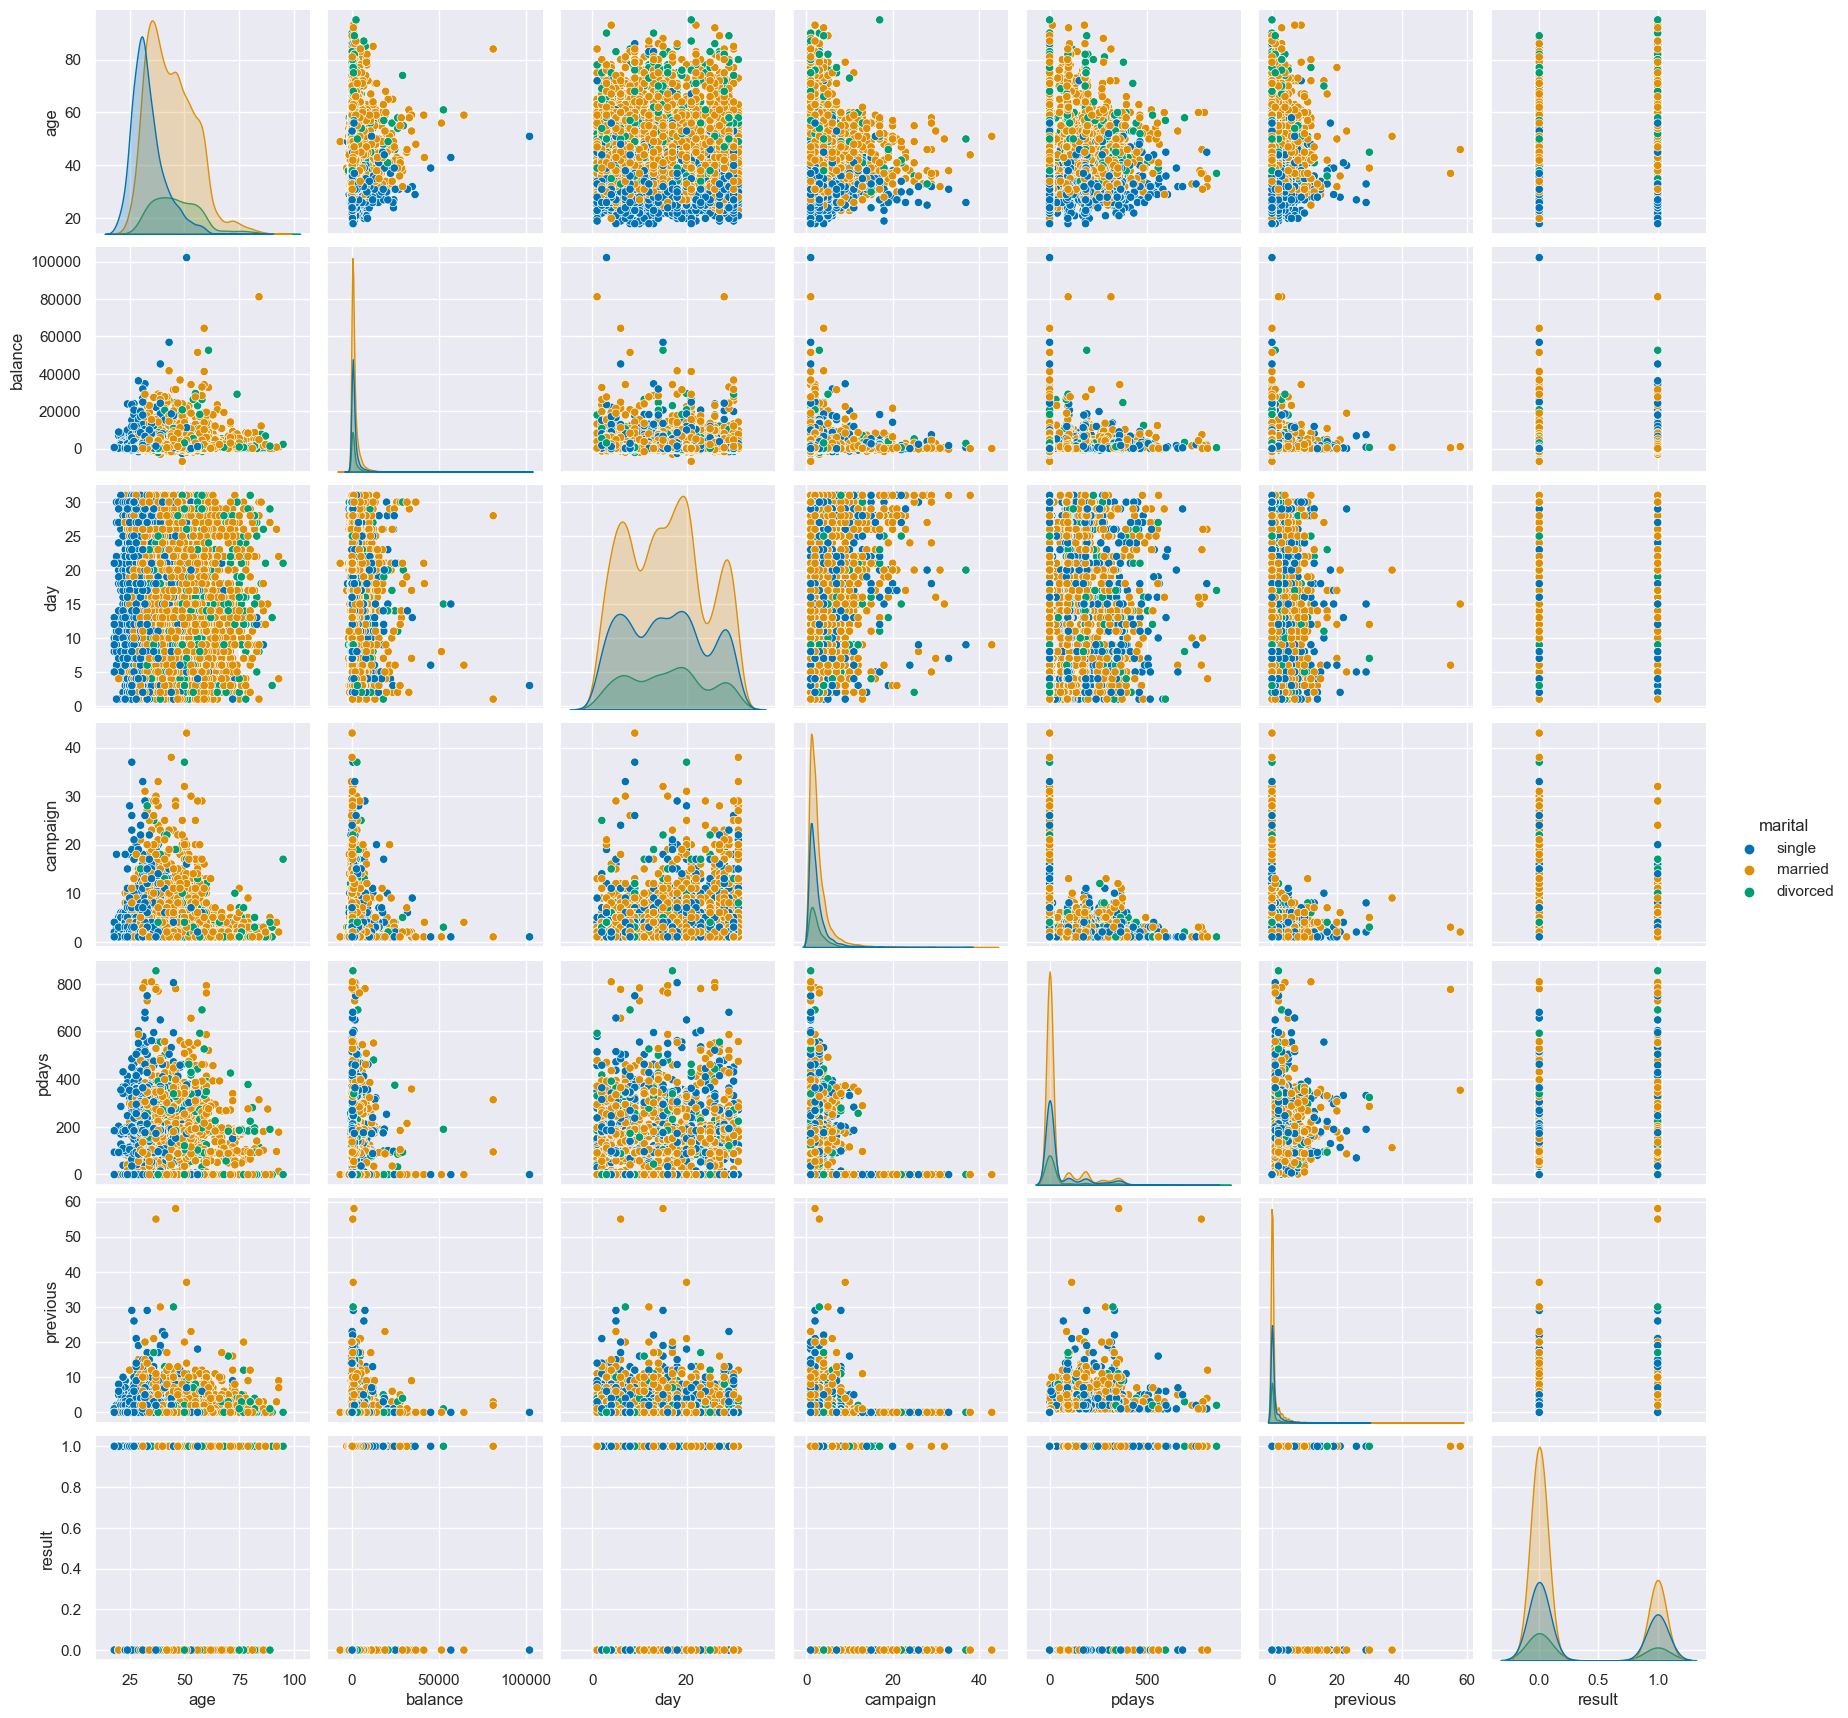

In [10]:
sns.pairplot(data, hue='marital',palette='colorblind')

/Users/sulik/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='result', ylabel='Density'>

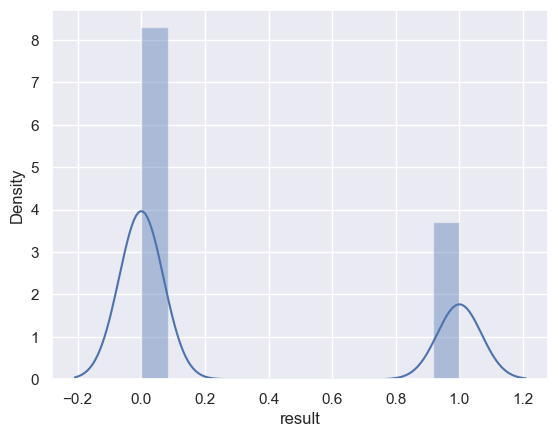

In [11]:
sns.distplot(data['result'])

In [12]:
data.iplot(kind='bar', x='contact' ,y='result')

<AxesSubplot:xlabel='day', ylabel='result'>

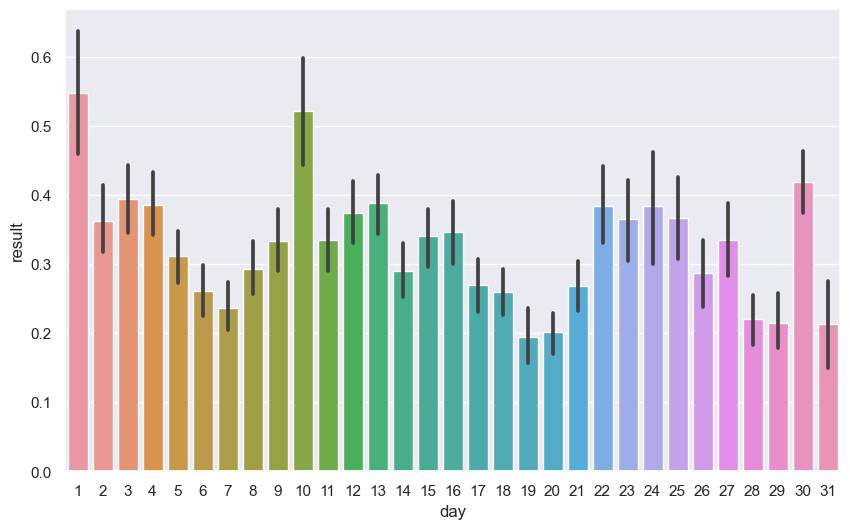

In [65]:
plt.figure(figsize=(10,6))
sns.barplot(x='day',y='result',data=data)

In [14]:
data['age'].iplot(kind='hist',bins=30)

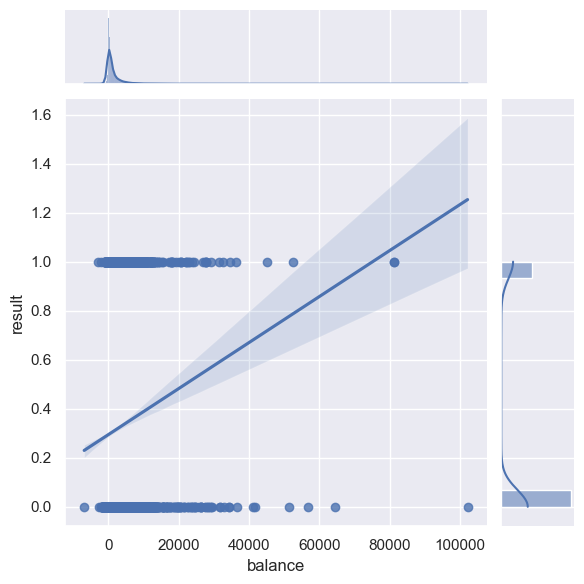

In [15]:
sns.jointplot(y='result',x='balance',data=data,kind='reg')

In [16]:
data.columns

Index(['age', 'marital', 'education', 'default', 'balance', 'housing', 'loan',
       'contact', 'day', 'campaign', 'pdays', 'previous', 'response',
       'result'],
      dtype='object')

In [17]:
corr = data.corr()['result']

high_corr_feats = corr[abs(corr) > 0.01].index.tolist()

high_corr_feats

['age', 'balance', 'day', 'campaign', 'pdays', 'previous', 'result']

In [18]:
data=data[['age', 'balance', 'day', 'campaign', 'pdays', 'previous', 'result']]

<AxesSubplot:>

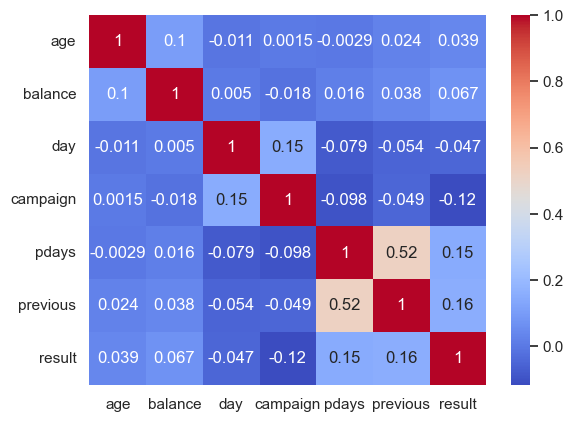

In [19]:
sns.heatmap(data.corr(), cmap='coolwarm', annot=True)

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables=data[['age', 'balance', 'day', 'campaign', 'pdays', 'previous']]
vif=pd.DataFrame()

vif['VIF']=[variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

vif['Features']=variables.columns
vif

,VIF,Features
0,4.265644,age
1,1.215187,balance
2,3.795306,day
3,1.871472,campaign
4,1.626084,pdays
5,1.532465,previous


In [21]:
data=data[['age','balance','day','campaign','pdays','previous','result']]

In [22]:
data

,age,balance,day,campaign,pdays,previous,result
0,29,18254,11,2,-1,0,0
1,26,512,5,3,-1,0,0
2,30,135,14,2,-1,0,0
3,41,30,10,1,-1,0,0
4,27,321,2,1,-1,0,0
...,...,...,...,...,...,...,...
12865,47,1167,30,1,87,5,1
12866,31,111,21,2,93,2,1
12867,37,1316,18,1,172,2,0
12868,42,479,28,2,-1,0,0


In [23]:
data['pdays'].value_counts

<bound method IndexOpsMixin.value_counts of 0         -1
1         -1
2         -1
3         -1
4         -1
        ... 
12865     87
12866     93
12867    172
12868     -1
12869     -1
Name: pdays, Length: 12870, dtype: int64>

In [24]:
data['previous'].value_counts()

0     10067
1       921
2       692
3       391
4       248
5       182
6       109
7        60
8        54
9        28
10       28
12       20
11       18
13       11
14        6
17        6
16        4
15        4
20        4
19        2
21        2
23        2
29        2
30        2
18        2
26        1
37        1
22        1
58        1
55        1
Name: previous, dtype: int64

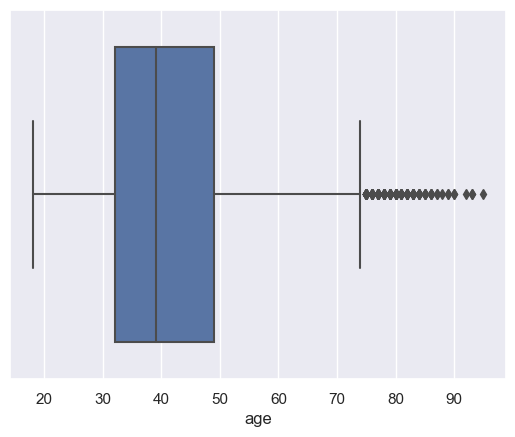

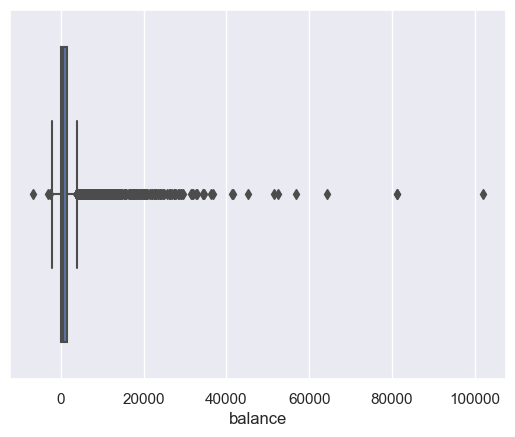

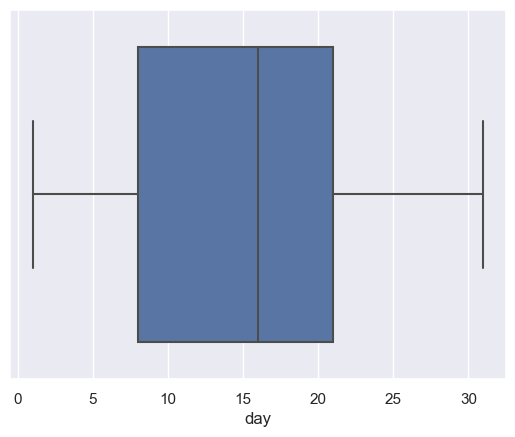

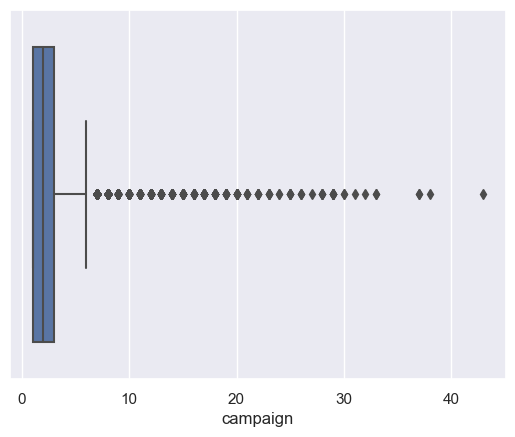

In [25]:
for i in data[['age', 'balance', 'day', 'campaign']]:
    sns.boxplot(data=data, x=data[i])
    plt.show()

In [26]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)
IQR=q3-q1
lower=q1-1.5*IQR
upper=q3+1.5*IQR

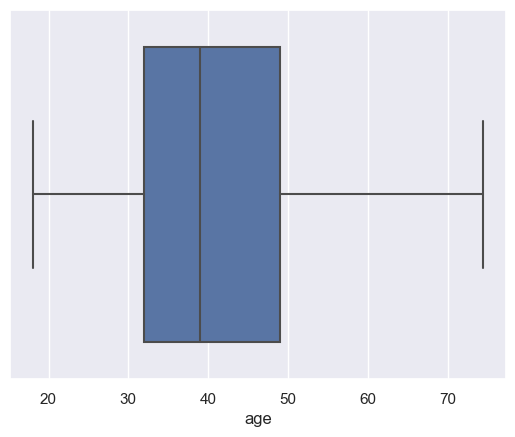

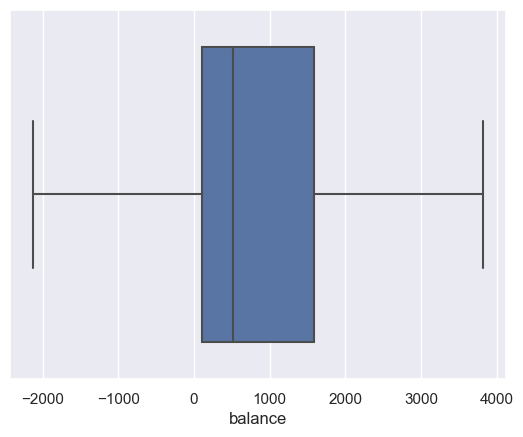

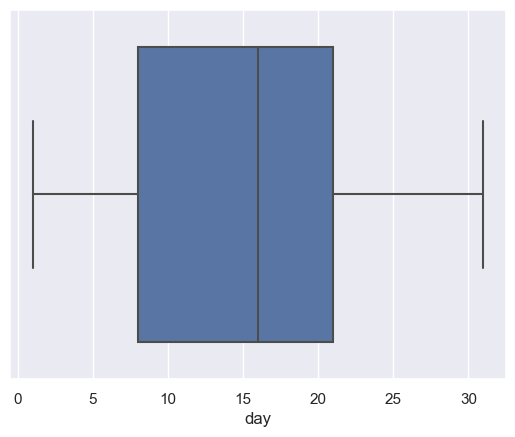

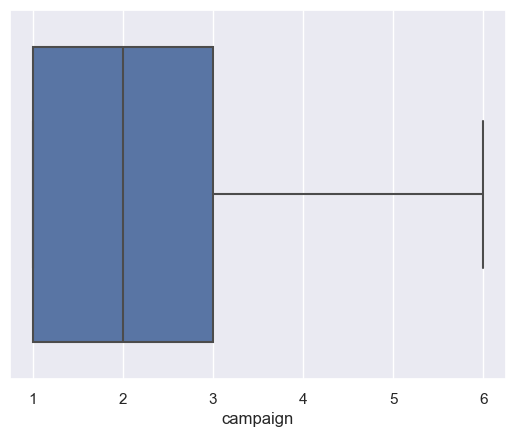

In [27]:
for i in data[['age', 'balance', 'day', 'campaign']]:
    data[i]=np.where(data[i]>upper[i],upper[i],data[i])
    data[i]=np.where(data[i]<lower[i],lower[i],data[i])
    sns.boxplot(data=data, x=data[i])
    plt.show()

In [28]:
data

,age,balance,day,campaign,pdays,previous,result
0,29.0,3826.375,11.0,2.0,-1,0,0
1,26.0,512.000,5.0,3.0,-1,0,0
2,30.0,135.000,14.0,2.0,-1,0,0
3,41.0,30.000,10.0,1.0,-1,0,0
4,27.0,321.000,2.0,1.0,-1,0,0
...,...,...,...,...,...,...,...
12865,47.0,1167.000,30.0,1.0,87,5,1
12866,31.0,111.000,21.0,2.0,93,2,1
12867,37.0,1316.000,18.0,1.0,172,2,0
12868,42.0,479.000,28.0,2.0,-1,0,0


In [29]:
data.dtypes

age         float64
balance     float64
day         float64
campaign    float64
pdays         int64
previous      int64
result        int64
dtype: object

In [30]:
ranges = [-np.inf, data['age'].quantile(0.25), data['age'].quantile(0.5), data['age'].quantile(0.75), np.inf]  # np.inf for infinity
data['age_category'] = pd.cut(data['age'], bins=ranges)

grouped = data.groupby(['age_category', 'result'])['result'].count().unstack().reset_index()


grouped['positive_prop'] = grouped[0] / grouped[0].sum()
grouped['negative_prop'] = grouped[1] / grouped[1].sum()
    

grouped['Age_woe'] = np.log(grouped['positive_prop'] / grouped['negative_prop'])
    
data = data.merge(grouped[['age_category','Age_woe']], how='left', on='age_category')

In [31]:
ranges = [-np.inf, data['balance'].quantile(0.25), data['balance'].quantile(0.5), data['balance'].quantile(0.75), np.inf]
data['balance_category'] = pd.cut(data['balance'], bins=ranges)

grouped = data.groupby(['balance_category', 'result'])['result'].count().unstack().reset_index()


grouped['positive_prop'] = grouped[0] / grouped[0].sum()
grouped['negative_prop'] = grouped[1] / grouped[1].sum()
    

grouped['Balance_woe'] = np.log(grouped['positive_prop'] / grouped['negative_prop'])
    
data = data.merge(grouped[['balance_category','Balance_woe']], how='left', on='balance_category')

In [32]:
ranges = [-np.inf, data['day'].quantile(0.25), data['day'].quantile(0.5), data['day'].quantile(0.75), np.inf] 
data['day_category'] = pd.cut(data['day'], bins=ranges)

grouped = data.groupby(['day_category', 'result'])['result'].count().unstack().reset_index()


grouped['positive_prop'] = grouped[0] / grouped[0].sum()
grouped['negative_prop'] = grouped[1] / grouped[1].sum()
    

grouped['Day_woe'] = np.log(grouped['positive_prop'] / grouped['negative_prop'])
    
data = data.merge(grouped[['day_category','Day_woe']], how='left', on='day_category')

In [33]:
ranges = [-np.inf, data['campaign'].quantile(0.25), data['campaign'].quantile(0.5), data['campaign'].quantile(0.75), np.inf]  
data['campaign_category'] = pd.cut(data['day'], bins=ranges)

grouped = data.groupby(['campaign_category', 'result'])['result'].count().unstack().reset_index()


grouped['positive_prop'] = grouped[0] / grouped[0].sum()
grouped['negative_prop'] = grouped[1] / grouped[1].sum()
    

grouped['Campaign_woe'] = np.log(grouped['positive_prop'] / grouped['negative_prop'])
    
data = data.merge(grouped[['campaign_category','Campaign_woe']], how='left', on='campaign_category')

In [34]:
ranges = [-np.inf, data['pdays'].quantile(0.25), data['pdays'].quantile(0.5), data['pdays'].quantile(0.75), np.inf]  
data['pdays_category'] = pd.cut(data['pdays'], bins=ranges, duplicates='drop')

grouped = data.groupby(['pdays_category', 'result'])['result'].count().unstack().reset_index()


grouped['positive_prop'] = grouped[0] / grouped[0].sum()
grouped['negative_prop'] = grouped[1] / grouped[1].sum()
    

grouped['Pdays_woe'] = np.log(grouped['positive_prop'] / grouped['negative_prop'])
    
data = data.merge(grouped[['pdays_category','Pdays_woe']], how='left', on='pdays_category')

In [35]:
ranges = [-np.inf, data['previous'].quantile(0.25), data['previous'].quantile(0.5), data['previous'].quantile(0.75), np.inf]  
data['previous_category'] = pd.cut(data['previous'], bins=ranges, duplicates='drop')

grouped = data.groupby(['previous_category', 'result'])['result'].count().unstack().reset_index()


grouped['positive_prop'] = grouped[0] / grouped[0].sum()
grouped['negative_prop'] = grouped[1] / grouped[1].sum()
    

grouped['previous_woe'] = np.log(grouped['positive_prop'] / grouped['negative_prop'])
    
data = data.merge(grouped[['previous_category','previous_woe']], how='left', on='previous_category')

In [36]:
data

,age,balance,day,campaign,pdays,previous,result,age_category,Age_woe,balance_category,Balance_woe,day_category,Day_woe,campaign_category,Campaign_woe,pdays_category,Pdays_woe,previous_category,previous_woe
0,29.0,3826.375,11.0,2.0,-1,0,0,"(-inf, 32.0]",-0.191286,"(1591.75, inf]",-0.396176,"(8.0, 16.0]",-0.196250,"(3.0, inf]",0.031441,"(-inf, -1.0]",0.281116,"(-inf, 0.0]",0.281116
1,26.0,512.000,5.0,3.0,-1,0,0,"(-inf, 32.0]",-0.191286,"(102.0, 515.0]",0.036100,"(-inf, 8.0]",-0.063572,"(3.0, inf]",0.031441,"(-inf, -1.0]",0.281116,"(-inf, 0.0]",0.281116
2,30.0,135.000,14.0,2.0,-1,0,0,"(-inf, 32.0]",-0.191286,"(102.0, 515.0]",0.036100,"(8.0, 16.0]",-0.196250,"(3.0, inf]",0.031441,"(-inf, -1.0]",0.281116,"(-inf, 0.0]",0.281116
3,41.0,30.000,10.0,1.0,-1,0,0,"(39.0, 49.0]",0.292737,"(-inf, 102.0]",0.493008,"(8.0, 16.0]",-0.196250,"(3.0, inf]",0.031441,"(-inf, -1.0]",0.281116,"(-inf, 0.0]",0.281116
4,27.0,321.000,2.0,1.0,-1,0,0,"(-inf, 32.0]",-0.191286,"(102.0, 515.0]",0.036100,"(-inf, 8.0]",-0.063572,"(1.0, 2.0]",-0.241594,"(-inf, -1.0]",0.281116,"(-inf, 0.0]",0.281116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12865,47.0,1167.000,30.0,1.0,87,5,1,"(39.0, 49.0]",0.292737,"(515.0, 1591.75]",-0.056321,"(21.0, inf]",-0.013023,"(3.0, inf]",0.031441,"(-1.0, inf]",-0.853338,"(0.0, inf]",-0.853338
12866,31.0,111.000,21.0,2.0,93,2,1,"(-inf, 32.0]",-0.191286,"(102.0, 515.0]",0.036100,"(16.0, 21.0]",0.352696,"(3.0, inf]",0.031441,"(-1.0, inf]",-0.853338,"(0.0, inf]",-0.853338
12867,37.0,1316.000,18.0,1.0,172,2,0,"(32.0, 39.0]",0.105878,"(515.0, 1591.75]",-0.056321,"(16.0, 21.0]",0.352696,"(3.0, inf]",0.031441,"(-1.0, inf]",-0.853338,"(0.0, inf]",-0.853338
12868,42.0,479.000,28.0,2.0,-1,0,0,"(39.0, 49.0]",0.292737,"(102.0, 515.0]",0.036100,"(21.0, inf]",-0.013023,"(3.0, inf]",0.031441,"(-inf, -1.0]",0.281116,"(-inf, 0.0]",0.281116


In [37]:
data.columns

Index(['age', 'balance', 'day', 'campaign', 'pdays', 'previous', 'result',
       'age_category', 'Age_woe', 'balance_category', 'Balance_woe',
       'day_category', 'Day_woe', 'campaign_category', 'Campaign_woe',
       'pdays_category', 'Pdays_woe', 'previous_category', 'previous_woe'],
      dtype='object')

In [38]:
data=data[['Age_woe',
           'Balance_woe',
           'Day_woe',
           'Campaign_woe',
           'Pdays_woe',
           'previous_woe',
           'result']]

In [39]:
x=data.drop(['result'],axis=1)
y=data['result']

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [42]:
def evaluate(model,x_test,y_test):
    y_pred=model.predict(x_test)
    y_prob=model.predict_proba(x_test)[:,1]
    
    roc_pred=roc_auc_score(y_test,y_pred)
    roc_prob=roc_auc_score(y_test,y_prob)
    
    gini_pred=(roc_pred*2)-1
    gini_prob=(roc_prob*2)-1
    
    print('Gini pred is', gini_pred*100)
    print('Gini prob is', gini_prob*100)
    
    return gini_pred
    return gini_prob

In [43]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [44]:
result=evaluate(rfc, x_test, y_test)

Gini pred is 17.46862684387771
Gini prob is 32.48553502873881


In [45]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators=[int(x) for x in np.linspace(start=200, stop=2000, num=10)]

max_features = ['auto','sqrt']

max_depth = [int(x) for x in np.linspace(start=10, stop=110, num=11)]

min_samples_split=[2,5,10]

min_samples_leaf=[1,2,4]
           
random_grid={'n_estimators':n_estimators,
             'max_features':max_features,
             'max_depth': max_depth ,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [46]:
rf_random=RandomizedSearchCV(estimator=rfc, param_distributions=random_grid, n_iter=1, cv=3, verbose=1, n_jobs=-1)
rf_random.fit(x_train,y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=1,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   verbose=1)

In [47]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 10}

In [48]:
optimized_model=rf_random.best_estimator_

In [49]:
optimized= evaluate(optimized_model, x_test, y_test)

Gini pred is 18.11883383216939
Gini prob is 33.56902221763522


In [50]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

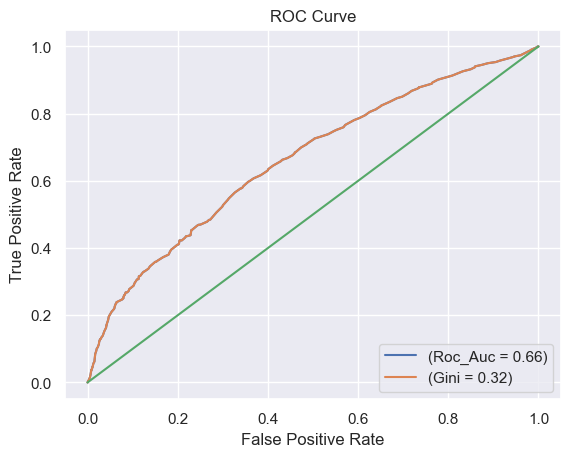

In [51]:
y_prob = rfc.predict_proba(x_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')
plt.show()

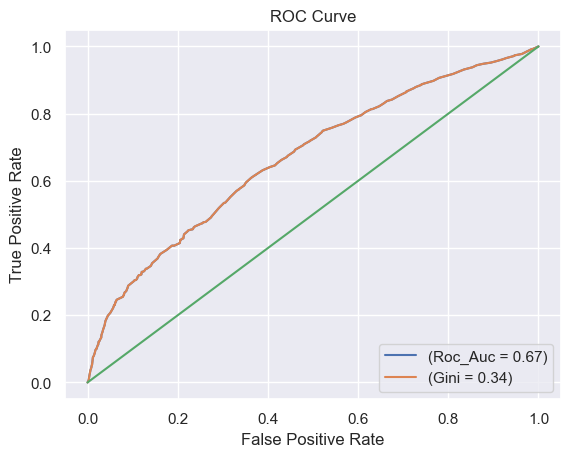

In [52]:
y_prob = optimized_model.predict_proba(x_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')
plt.show()